In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [2]:
assets = ["VALE", "PETR4", "ITUB4", "BBDC4", "ABEV3", "BBAS3", "ITSA4", "BVMF3", "KROT3", "CIEL3", "UGPA3", "BBSE3"]
bvmf_data = pd.DataFrame()
for t in assets:
    bvmf_data[t] = wb.DataReader(t, data_source='google', start='2015-1-1')['Close']

In [3]:
bvmf_data.head()


,VALE,PETR4,ITUB4,BBDC4,ABEV3,BBAS3,ITSA4,BVMF3,KROT3,CIEL3,UGPA3,BBSE3
Date,,,,,,,,,,,,
2015-01-02,7.94,9.36,27.96,23.62,16.01,22.65,7.58,9.50,14.80,22.99,50.66,30.47
2015-01-05,7.73,8.61,28.10,23.66,15.66,22.18,7.60,9.22,13.86,22.20,49.41,29.51
2015-01-06,8.14,8.33,28.55,24.44,16.11,22.49,7.66,9.31,12.65,21.76,49.10,30.66
2015-01-07,8.34,8.67,29.59,25.41,16.51,23.48,7.95,9.71,12.66,21.96,50.40,30.30
2015-01-08,8.57,9.18,30.05,25.54,16.48,23.56,8.03,9.61,13.56,22.57,50.24,30.16


In [4]:
log_returns = np.log(bvmf_data / bvmf_data.shift(1)) # Normalizing returns by using log

In [5]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    weights = np.random.rand(n)
    weights /= np.sum(weights)
    return weights

# Create a random portfolio distribution weigths, that sums 100%
print(rand_weights(len(assets)))

[ 0.11246052  0.1497936   0.04287148  0.03265698  0.12607904  0.01852747
  0.01410171  0.17025479  0.00054792  0.12489561  0.05034853  0.15746236]


In [6]:
pfolio_returns = []
pfolio_volatilities = []
max_sharpe = 0
max_weights = np.random.rand(len(assets))
for x in range (50000):
    weights = rand_weights(len(assets))
    retorno = np.sum(weights * log_returns.mean()) * 250
    volatilidade = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))
    if (retorno/volatilidade) > max_sharpe:
        max_sharpe = (retorno/volatilidade)
        max_weights = weights
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities
sharpe_arr = pfolio_returns / pfolio_volatilities
sharpe_ind_max = sharpe_arr.argmax()
max_sr_ret = pfolio_returns[sharpe_ind_max]
max_sr_vol = pfolio_volatilities[sharpe_ind_max]

In [7]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

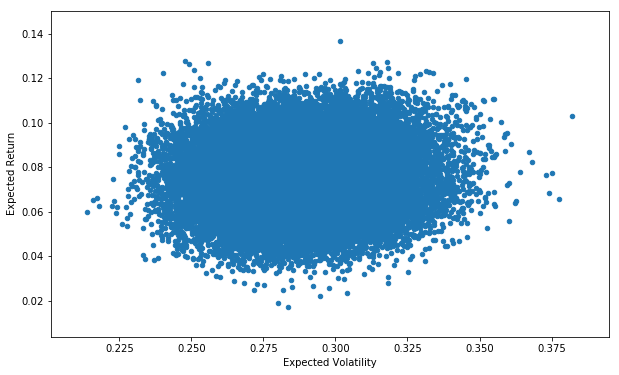

In [8]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

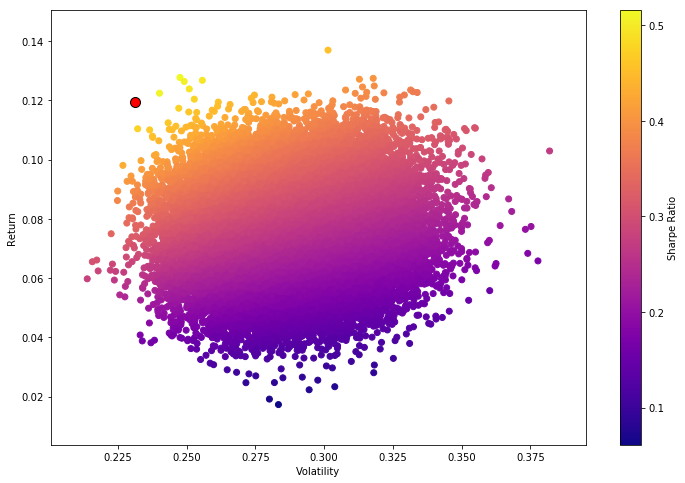

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(pfolio_volatilities,pfolio_returns,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')

In [10]:
print('Retorno máximo (max Sharpe):', max_sr_ret)
print('Volatilidade (max Sharpe):', max_sr_vol)
print('Composição do Portfolio')
for x,y in zip(assets, max_weights):
    print(x,y)

Retorno máximo (max Sharpe): 0.119392370945
Volatilidade (max Sharpe): 0.231315109814
Composição do Portfolio
VALE 0.0138784429757
PETR4 0.0244419248252
ITUB4 0.0348819859944
BBDC4 0.00439187818111
ABEV3 0.190887668615
BBAS3 0.0877010163648
ITSA4 0.0543235224135
BVMF3 0.241022790499
KROT3 0.0713081632879
CIEL3 0.037322146906
UGPA3 0.231034142768
BBSE3 0.00880631716984
